In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from engine import Value
from trace_graph import draw_dot
from neural_network import MultiLayerPerceptron

# Resources
- [Activation Functions in Neural Networks](https://www.geeksforgeeks.org/activation-functions-neural-networks/) 

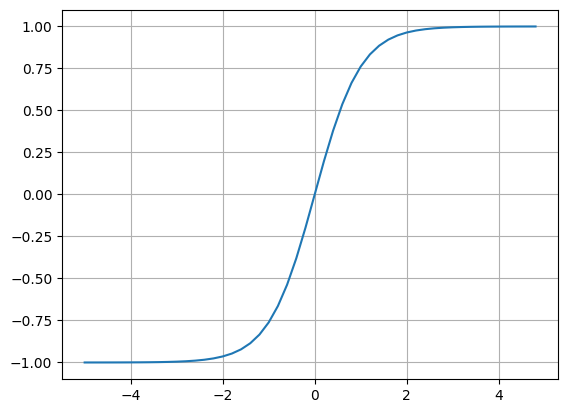

In [2]:
# the tanh function - an activation function
# activation functions decide whether a neuron should be activated
# it introduces non-linearity into the model, allowing the model to learn and represent complex patterns in data
# tanh stands for hyperbolic tangent function with values ranging from -1 to 1
#
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

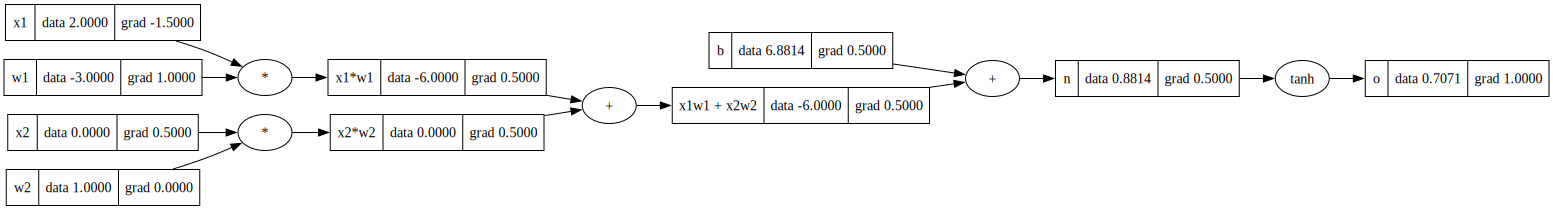

In [3]:
# inputs x1, x2 of 2D nueron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias b of the nueron
b = Value(6.88137358, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

draw_dot(o)

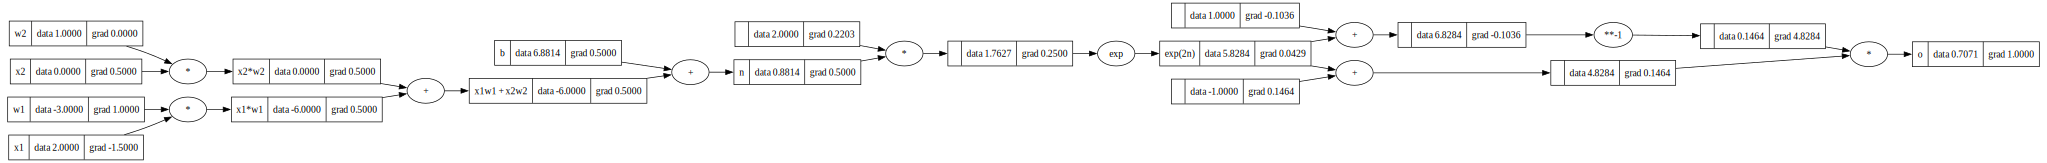

In [4]:
# inputs x1, x2 of 2D nueron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias b of the nueron
b = Value(6.88137358, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = 'n'
# --- now break down tanh(), expect same forward pass and backward, aka same values and gradients as when used tanh()
e = (2*n).exp()
e.label = 'exp(2n)'
o = (e - 1) / (e + 1)
o.label = 'o'
# ---
o.backward()

draw_dot(o)

In [5]:
"""
micrograd is roughly modeled after PyTorch
micrograd is a scalar valued engine, scalar values like 2.0

pytorch is modeled on tensors
"""
import torch

# note: tensor default type is float32, here we cast to doubles for a single precision float
# note: pytorch assumes by default that leaf nodes do not require gradients, this is for efficiency reasons, so we will set this to True explicitly
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.88137358]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)  # this is a tensor, with a data and grad attributes

# we call .item(), takes tensor of single item and strips the tensor
# o.item() and o.data.item() produce the same result in PyTorch
# o is a tensor object which also has a backward function
print(o.data.item())  
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [6]:
x = [2.0, 3.0, -1.0]  # 3 dimensional input
n = MultiLayerPerceptron(3, [4, 4, 1])  # 3 input and 2 layers of 4 and 1 output layer
print(n(x))
#draw_dot(n(x))
print(len(n.parameters()))

Value(data=-0.6686839792480167,grad=0.0)
41


In [7]:
n.parameters()  # all the weights and biases in the neural net, this has 41 of these parameters

[Value(data=-0.10034442437427105,grad=0.0),
 Value(data=-0.4570453152922733,grad=0.0),
 Value(data=-0.12354122030350045,grad=0.0),
 Value(data=0.17607035823258554,grad=0.0),
 Value(data=0.3443087162123024,grad=0.0),
 Value(data=-0.663386039743024,grad=0.0),
 Value(data=-0.229687320659953,grad=0.0),
 Value(data=0.1761695249955626,grad=0.0),
 Value(data=0.3835591186981777,grad=0.0),
 Value(data=0.0813142645806566,grad=0.0),
 Value(data=-0.21919371777243168,grad=0.0),
 Value(data=-0.1850994158773569,grad=0.0),
 Value(data=-0.006451762219708002,grad=0.0),
 Value(data=0.9817239521883807,grad=0.0),
 Value(data=0.022952827091545558,grad=0.0),
 Value(data=0.7950377450129771,grad=0.0),
 Value(data=-0.11017282136793871,grad=0.0),
 Value(data=-0.7708459473185645,grad=0.0),
 Value(data=0.9582872916793821,grad=0.0),
 Value(data=-0.9975294023077375,grad=0.0),
 Value(data=-0.04941376439067868,grad=0.0),
 Value(data=0.8706205325550576,grad=0.0),
 Value(data=0.198916429992684,grad=0.0),
 Value(data=-0.

In [8]:
# simple example dataset
# xs has 4 examples, aka 4 possible inputs into the neural net
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
# this will be a simple binary classifier neural network
# first xs example [2.0, 3.0, -1.0] should result in 1.0, etc
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [9]:
# Step 1: Forward pass
ypred = [n(x) for x in xs]
print("ypred", ypred)  # this is the prediction given the 4 examples
# how do you tune the weights to better predict the desired targets?

# Calculate the loss
# we will use a single number to calculate the total performance of your neural net...this is the loss
# let's look at the mean squared error loss
# ygt = y ground truth
# we want to minimize the loss, this means that every target is close to prediction
# aka low loss means the predictions are matching the targets better
# the loss values are 0 only when yout is equal to y ground truth
losses = [(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)]
loss = sum(losses)
print("loss", loss)

# this will have 4 forward passes of the neural net, and the loss on top, with the loss value at the very right
# xs are inputs to the neural net
# gradient values on input data are not that useful to us because the input data is not changeable, aka they are fixed inputs
# the weight and bias for each neuron in the neural net we do want to change, the gradients of those matter

# draw_dot(loss)

ypred [Value(data=-0.6686839792480167,grad=0.0), Value(data=-0.1352720301281473,grad=0.0), Value(data=0.21771976631619483,grad=0.0), Value(data=0.10891746993554663,grad=0.0)]
loss Value(data=5.809130189140926,grad=0.0)


In [10]:
# Step 2: Backward Pass
loss.backward()

In [11]:
# Step 3: Update - aka nudge
# we want to minimize the loss, aka decrease it
# the learning rate 0.01 here can be tricky, too low and it takes way too long to converge, too high and your loss may explode
# finding the step size to be just right is an art with vanilla gradient descent
for p in n.parameters():
    p.data += -0.01 * p.grad

In [12]:
# do this on a loop, this is gradient descent
ypred

[Value(data=-0.6686839792480167,grad=-3.337367958496033),
 Value(data=-0.1352720301281473,grad=1.7294559397437053),
 Value(data=0.21771976631619483,grad=2.4354395326323894),
 Value(data=0.10891746993554663,grad=-1.7821650601289067)]

In [13]:
# these are the weights and biases that makes our network preduct the desired targets very very close
n.parameters()

[Value(data=-0.11638700569343545,grad=1.6042581319164404),
 Value(data=-0.4481820549079687,grad=-0.8863260384304651),
 Value(data=-0.14434000771659297,grad=2.079878741309251),
 Value(data=0.16862299440761727,grad=0.7447363824968269),
 Value(data=0.3549389839071704,grad=-1.0630267694867983),
 Value(data=-0.6470995893672532,grad=-1.628645037577079),
 Value(data=-0.2542462094096211,grad=2.455888874966813),
 Value(data=0.18004754807017248,grad=-0.387802307460988),
 Value(data=0.40244681617889416,grad=-1.8887697480716465),
 Value(data=0.06257556020747568,grad=1.8738704373180923),
 Value(data=-0.17743633777029016,grad=-4.175738000214151),
 Value(data=-0.17232243908731223,grad=-1.277697679004467),
 Value(data=-0.04489533033290568,grad=3.8443568113197677),
 Value(data=0.9947036929898452,grad=-1.2979740801464494),
 Value(data=0.0135833185020894,grad=0.9369508589456157),
 Value(data=0.7818910342619014,grad=1.314671075107565),
 Value(data=-0.10004891288761908,grad=-1.0123908480319637),
 Value(dat

In [14]:
# init neural net
n = MultiLayerPerceptron(3, [4, 4, 1])  # 3 input and 2 layers of 4 and 1 output layer

# here's the data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [15]:
# let's put it all together - gradient descent

for k in range(20):

    # forward pass
    ypred = [n(x) for x in xs]
    # evaluate the loss
    loss = sum([(yout - ygt) ** 2 for ygt, yout in zip(ys, ypred)])
    # backward pass - don't forget to zero out the gradients of the parameters!!!
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    # update - simple stochastic gradient update
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, loss.data, )


0 5.772896967600804
1 4.164752136595266
2 3.330328592788346
3 2.8317076021007006
4 2.269658902413969
5 1.645560700459808
6 1.0869291984958518
7 0.6978620352560083
8 0.4680131627258232
9 0.33396691307874293
10 0.25144124069858226
11 0.19747630468496463
12 0.16029412978337887
13 0.13354551193819703
14 0.11360813483385496
15 0.09830508844840835
16 0.086267454431008
17 0.076600136903414
18 0.06869782327292909
19 0.0621390520735253


In [16]:
ypred

[Value(data=0.9145559542471705,grad=-0.17088809150565898),
 Value(data=-0.8793315644012719,grad=0.24133687119745617),
 Value(data=-0.8681866429574425,grad=0.26362671408511495),
 Value(data=0.8486635051475007,grad=-0.3026729897049987)]

In [17]:
# neural nets are mathematical expressions that take inputs as data and inputs as weights
# the loss function measures the accuracy of predictions
# low loss means the network is doing what you want it to do
# then we do backprogation to get the gradients so we know how to tune the weights
# we follow the gradient information that minimizes the loss